***
# <font color=green size=10>CREDIT RISK MODELING</font>
***

In [58]:
# Libs
import numpy as np
import pandas as pd

# <font color=green>1 IMPORT DATA</font>
***

In [59]:
df = pd.read_csv('./dataset/preprocessed_data_from_2007_2014.csv')

#### Observations

Columns name with suffix _cl indicates they have went through some preprocessing steps (missing values and others). In other words, they have been cleaned.

# <font color=green>2 EXPLORATORY DATA ANALYSIS</font>
***

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Columns: 139 entries, id to emp_length_int_cl
dtypes: int64(131), object(8)
memory usage: 494.5+ MB


In [61]:
df.head()

,id,member_id,loan_status,grade,sub_grade,home_ownership,addr_state,verification_status,purpose,initial_list_status,...,total_rev_hi_lim_cl,annual_inc_cl,acc_now_delinq_cl,total_acc_cl,pub_rec_cl,open_acc_cl,inq_last_6mths_cl,delinq_2yrs,mths_since_earliest_cr_line_cl,emp_length_int_cl
0,1069971,1304884,Fully Paid,A,A1,MORTGAGE,CT,Not Verified,major_purchase,f,...,3600,110000,0,42,0,20,0,0,292,10
1,1069742,1304855,Fully Paid,A,A1,RENT,CA,Not Verified,debt_consolidation,f,...,9200,77385,0,28,0,8,0,0,203,6
2,1068967,1303403,Fully Paid,A,A1,RENT,CA,Source Verified,major_purchase,f,...,4500,53000,0,17,0,7,0,0,206,4
3,1068350,1302971,Fully Paid,A,A1,MORTGAGE,IL,Verified,car,f,...,3500,83000,0,28,0,6,0,0,383,10
4,1060662,1292431,Fully Paid,A,A1,MORTGAGE,WV,Not Verified,small_business,f,...,6200,26500,0,18,0,6,0,0,210,5


In [62]:
df.columns.values

array(['id', 'member_id', 'loan_status', 'grade', 'sub_grade',
       'home_ownership', 'addr_state', 'verification_status', 'purpose',
       'initial_list_status', 'term_int', 'mths_since_issue_d', 'grade_A',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'addr_state_CT',
       'addr_state_CA', 'addr_state_IL', 'addr_state_WV', 'addr_state_MD',
 

In [63]:
df.describe()

,id,member_id,term_int,mths_since_issue_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,...,total_rev_hi_lim_cl,annual_inc_cl,acc_now_delinq_cl,total_acc_cl,pub_rec_cl,open_acc_cl,inq_last_6mths_cl,delinq_2yrs,mths_since_earliest_cr_line_cl,emp_length_int_cl
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,...,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000
mean,1.307973e+07,1.459766e+07,42.605334,51.255187,0.160561,0.293659,0.268705,0.164895,0.076685,0.028371,...,2.757367e+04,7.327738e+04,0.004002,25.062871,0.160554,11.186373,0.804695,0.284661,242.370299,5.723307
std,1.089371e+07,1.168237e+07,10.719040,14.340154,0.367126,0.455438,0.443287,0.371086,0.266091,0.166031,...,3.509068e+04,5.496333e+04,0.068635,11.601464,0.510848,4.988151,1.091583,0.797343,86.478749,3.756084
min,5.473400e+04,7.047300e+04,36.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.639987e+06,4.379705e+06,36.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.160000e+04,4.500000e+04,0.000000,17.000000,0.000000,8.000000,0.000000,0.000000,184.000000,2.000000
50%,1.010790e+07,1.194108e+07,36.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.010000e+04,6.300000e+04,0.000000,23.000000,0.000000,10.000000,0.000000,0.000000,226.000000,6.000000
75%,2.073121e+07,2.300154e+07,60.000000,57.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,3.460000e+04,8.895300e+04,0.000000,32.000000,0.000000,14.000000,1.000000,0.000000,285.000000,10.000000
max,3.809811e+07,4.086083e+07,60.000000,126.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.999999e+06,7.500000e+06,5.000000,156.000000,63.000000,84.000000,33.000000,29.000000,587.000000,10.000000


# <font color=green>3 DATA PREPARATION</font>

***

### Dependent Variable (Target Label). Good/ Bar (Default) Definition. Default and Non-default Accounts

In [64]:
(df['loan_status'].value_counts() / df['loan_status'].count()) * 100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [65]:
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off',
                                                                 'Default',
                                                                 'Does not meet the credit policy. Status:Charged Off',
                                                                 'Late (31-120 days)']), 0 ,1)

In [66]:
df['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

### Splitting Data
- train size: 80 %
- test  size: 20 %

In [67]:
# Imports the libraries we need.
from sklearn.model_selection import train_test_split

In [68]:
X, y = df.drop(labels = ['good_bad'], axis = 1), df['good_bad']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train.shape

(373028, 139)

In [71]:
X_test.shape

(93257, 139)

In [72]:
# X_prepr, y_prepr = X_test.copy(), y_test.copy()

X_prepr, y_prepr = X_train.copy(), y_train.copy()

### Preprocessing Discrete Variables: An Example

In [73]:
X_prepr['grade'].unique()

array(['F', 'D', 'E', 'B', 'A', 'C', 'G'], dtype=object)

In [74]:
# Concatenates two dataframe along the columns.
df_tmp = pd.concat([X_prepr['grade'], y_prepr], axis = 1)
df_tmp.head()

,grade,good_bad
427211,F,1
206088,D,1
136020,D,1
412305,E,1
36159,B,1


In [75]:
df_tmp.columns.values[0]

'grade'

In [76]:

# To remember the syntax:

# df.groupby(Series1)[Series2].method

# Groups Series2 from dataframe df by Series1 from dataframe df and aggregate Series2, applying the method.

df_tmp.groupby(df_tmp.columns.values[0], as_index = False)[df_tmp.columns.values[1]].count()

,grade,good_bad
0,A,60007
1,B,109473
2,C,100161
3,D,61624
4,E,28580
5,F,10559
6,G,2624


In [77]:
# Here we calculate the mean of the values in the column with index 1 for each value of the column with index 0.

df_tmp.groupby(df_tmp.columns.values[0], as_index = False)[df_tmp.columns.values[1]].mean()

,grade,good_bad
0,A,0.961205
1,B,0.921405
2,C,0.886123
3,D,0.845807
4,E,0.805108
5,F,0.759826
6,G,0.724085


In [78]:
# Joining them together
df_tmp = pd.concat([df_tmp.groupby(df_tmp.columns.values[0], as_index = False)[df_tmp.columns.values[1]].count(),
           df_tmp.groupby(df_tmp.columns.values[0], as_index = False)[df_tmp.columns.values[1]].mean()], axis = 1)


In [79]:
df_tmp

,grade,good_bad,grade,good_bad
0,A,60007,A,0.961205
1,B,109473,B,0.921405
2,C,100161,C,0.886123
3,D,61624,D,0.845807
4,E,28580,E,0.805108
5,F,10559,F,0.759826
6,G,2624,G,0.724085


In [80]:
# Select only columns with specific indexes
df_tmp = df_tmp.iloc[:, [0, 1, 3]]
df_tmp

,grade,good_bad,good_bad
0,A,60007,0.961205
1,B,109473,0.921405
2,C,100161,0.886123
3,D,61624,0.845807
4,E,28580,0.805108
5,F,10559,0.759826
6,G,2624,0.724085


In [81]:
df_tmp.columns = [df_tmp.columns.values[0], 'n_obs', 'prop_good']
df_tmp

,grade,n_obs,prop_good
0,A,60007,0.961205
1,B,109473,0.921405
2,C,100161,0.886123
3,D,61624,0.845807
4,E,28580,0.805108
5,F,10559,0.759826
6,G,2624,0.724085


In [82]:
# We divide the values of one column by he values of another column and save the result in a new variable.

df_tmp['prop_n_obs'] = df_tmp['n_obs'] / df_tmp['n_obs'].sum()
df_tmp

,grade,n_obs,prop_good,prop_n_obs
0,A,60007,0.961205,0.160865
1,B,109473,0.921405,0.293471
2,C,100161,0.886123,0.268508
3,D,61624,0.845807,0.165199
4,E,28580,0.805108,0.076616
5,F,10559,0.759826,0.028306
6,G,2624,0.724085,0.007034


In [83]:
# We multiply the values of one column by he values of another column and save the result in a new variable.
df_tmp['n_good'], df_tmp['n_bad'] = df_tmp['prop_good'] * df_tmp['n_obs'], ((1 - df_tmp['prop_good'])* df_tmp['n_obs'])

df_tmp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,60007,0.961205,0.160865,57679.0,2328.0
1,B,109473,0.921405,0.293471,100869.0,8604.0
2,C,100161,0.886123,0.268508,88755.0,11406.0
3,D,61624,0.845807,0.165199,52122.0,9502.0
4,E,28580,0.805108,0.076616,23010.0,5570.0
5,F,10559,0.759826,0.028306,8023.0,2536.0
6,G,2624,0.724085,0.007034,1900.0,724.0


In [84]:
df_tmp['prop_n_good'] = df_tmp['n_good'] / df_tmp['n_good'].sum()
df_tmp['prop_n_bad'] = df_tmp['n_bad'] / df_tmp['n_bad'].sum()
df_tmp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,60007,0.961205,0.160865,57679.0,2328.0,0.173545,0.057241
1,B,109473,0.921405,0.293471,100869.0,8604.0,0.303495,0.211556
2,C,100161,0.886123,0.268508,88755.0,11406.0,0.267046,0.280452
3,D,61624,0.845807,0.165199,52122.0,9502.0,0.156825,0.233637
4,E,28580,0.805108,0.076616,23010.0,5570.0,0.069233,0.136956
5,F,10559,0.759826,0.028306,8023.0,2536.0,0.024140,0.062356
6,G,2624,0.724085,0.007034,1900.0,724.0,0.005717,0.017802


In [85]:
df_tmp['WoE'] = np.log(df_tmp['prop_n_good'] / df_tmp['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
df_tmp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,60007,0.961205,0.160865,57679.0,2328.0,0.173545,0.057241,1.109162
1,B,109473,0.921405,0.293471,100869.0,8604.0,0.303495,0.211556,0.360873
2,C,100161,0.886123,0.268508,88755.0,11406.0,0.267046,0.280452,-0.048982
3,D,61624,0.845807,0.165199,52122.0,9502.0,0.156825,0.233637,-0.398637
4,E,28580,0.805108,0.076616,23010.0,5570.0,0.069233,0.136956,-0.682188
5,F,10559,0.759826,0.028306,8023.0,2536.0,0.024140,0.062356,-0.948998
6,G,2624,0.724085,0.007034,1900.0,724.0,0.005717,0.017802,-1.135904


In [86]:
df_tmp = df_tmp.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
df_tmp = df_tmp.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
df_tmp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2624,0.724085,0.007034,1900.0,724.0,0.005717,0.017802,-1.135904
1,F,10559,0.759826,0.028306,8023.0,2536.0,0.024140,0.062356,-0.948998
2,E,28580,0.805108,0.076616,23010.0,5570.0,0.069233,0.136956,-0.682188
3,D,61624,0.845807,0.165199,52122.0,9502.0,0.156825,0.233637,-0.398637
4,C,100161,0.886123,0.268508,88755.0,11406.0,0.267046,0.280452,-0.048982
5,B,109473,0.921405,0.293471,100869.0,8604.0,0.303495,0.211556,0.360873
6,A,60007,0.961205,0.160865,57679.0,2328.0,0.173545,0.057241,1.109162


In [87]:
df_tmp['diff_prop_good'] = df_tmp['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df_tmp['diff_WoE'] = df_tmp['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df_tmp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2624,0.724085,0.007034,1900.0,724.0,0.005717,0.017802,-1.135904,NaN,NaN
1,F,10559,0.759826,0.028306,8023.0,2536.0,0.024140,0.062356,-0.948998,0.035740,0.186907
2,E,28580,0.805108,0.076616,23010.0,5570.0,0.069233,0.136956,-0.682188,0.045283,0.266809
3,D,61624,0.845807,0.165199,52122.0,9502.0,0.156825,0.233637,-0.398637,0.040698,0.283551
4,C,100161,0.886123,0.268508,88755.0,11406.0,0.267046,0.280452,-0.048982,0.040317,0.349655
5,B,109473,0.921405,0.293471,100869.0,8604.0,0.303495,0.211556,0.360873,0.035282,0.409855
6,A,60007,0.961205,0.160865,57679.0,2328.0,0.173545,0.057241,1.109162,0.039799,0.748288


In [88]:
df_tmp['IV'] = (df_tmp['prop_n_good'] - df_tmp['prop_n_bad']) * df_tmp['WoE']
df_tmp['IV'] = df_tmp['IV'].sum()
# We sum all values of a given column.
df_tmp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2624,0.724085,0.007034,1900.0,724.0,0.005717,0.017802,-1.135904,NaN,NaN,0.289649
1,F,10559,0.759826,0.028306,8023.0,2536.0,0.024140,0.062356,-0.948998,0.035740,0.186907,0.289649
2,E,28580,0.805108,0.076616,23010.0,5570.0,0.069233,0.136956,-0.682188,0.045283,0.266809,0.289649
3,D,61624,0.845807,0.165199,52122.0,9502.0,0.156825,0.233637,-0.398637,0.040698,0.283551,0.289649
4,C,100161,0.886123,0.268508,88755.0,11406.0,0.267046,0.280452,-0.048982,0.040317,0.349655,0.289649
5,B,109473,0.921405,0.293471,100869.0,8604.0,0.303495,0.211556,0.360873,0.035282,0.409855,0.289649
6,A,60007,0.961205,0.160865,57679.0,2328.0,0.173545,0.057241,1.109162,0.039799,0.748288,0.289649


### Preprocessing Discrete Variables: Automating Calculations

In [89]:
def calculate_woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    """ Here we combine all of the operations above in a function.
        
        The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns
        a dataframe as a result.
    """
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
    

In [90]:
# 'grade'
df_temp = calculate_woe_discrete(X_prepr, 'grade', y_train)

df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2624,0.724085,0.007034,1900.0,724.0,0.005717,0.017802,-1.135904,NaN,NaN,0.289649
1,F,10559,0.759826,0.028306,8023.0,2536.0,0.024140,0.062356,-0.948998,0.035740,0.186907,0.289649
2,E,28580,0.805108,0.076616,23010.0,5570.0,0.069233,0.136956,-0.682188,0.045283,0.266809,0.289649
3,D,61624,0.845807,0.165199,52122.0,9502.0,0.156825,0.233637,-0.398637,0.040698,0.283551,0.289649
4,C,100161,0.886123,0.268508,88755.0,11406.0,0.267046,0.280452,-0.048982,0.040317,0.349655,0.289649
5,B,109473,0.921405,0.293471,100869.0,8604.0,0.303495,0.211556,0.360873,0.035282,0.409855,0.289649
6,A,60007,0.961205,0.160865,57679.0,2328.0,0.173545,0.057241,1.109162,0.039799,0.748288,0.289649


# Preprocessing Discrete Variables: Visualing Results

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set()
# We set the default style of the graphs to the seaborn style. 

In [92]:
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

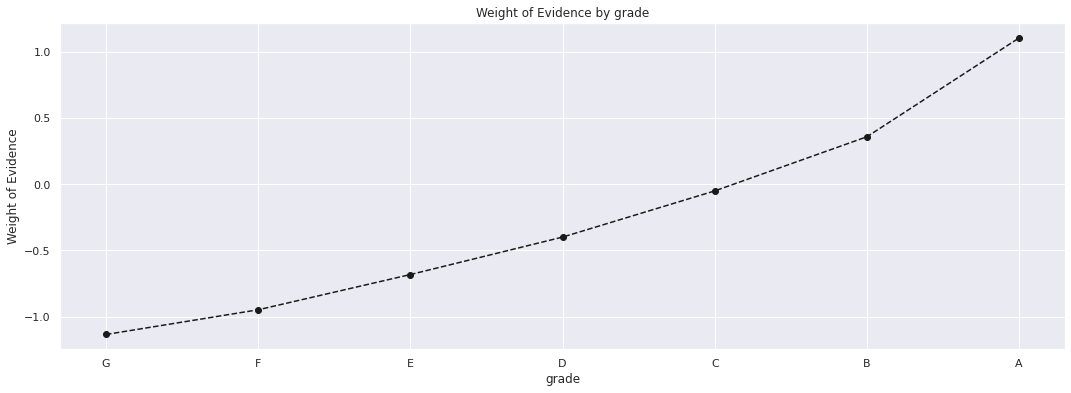

In [93]:
plot_by_woe(df_temp)


## Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [94]:
# 'home_ownership'
df_temp = calculate_woe_discrete(X_prepr, 'home_ownership', y_train)
# We calculate weight of evidence.
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.781022,0.000367,107.0,30.0,0.000322,0.000738,-0.829091,NaN,NaN,inf
1,NONE,39,0.820513,0.000105,32.0,7.0,0.000096,0.000172,-0.580896,0.039491,0.248194,inf
2,RENT,150842,0.874657,0.404372,131935.0,18907.0,0.396967,0.464888,-0.157945,0.054144,0.422951,inf
3,OWN,33357,0.891987,0.089422,29754.0,3603.0,0.089524,0.088591,0.010475,0.017330,0.168420,inf
4,MORTGAGE,188652,0.903934,0.505731,170529.0,18123.0,0.513088,0.445611,0.141002,0.011948,0.130527,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096066,inf,inf


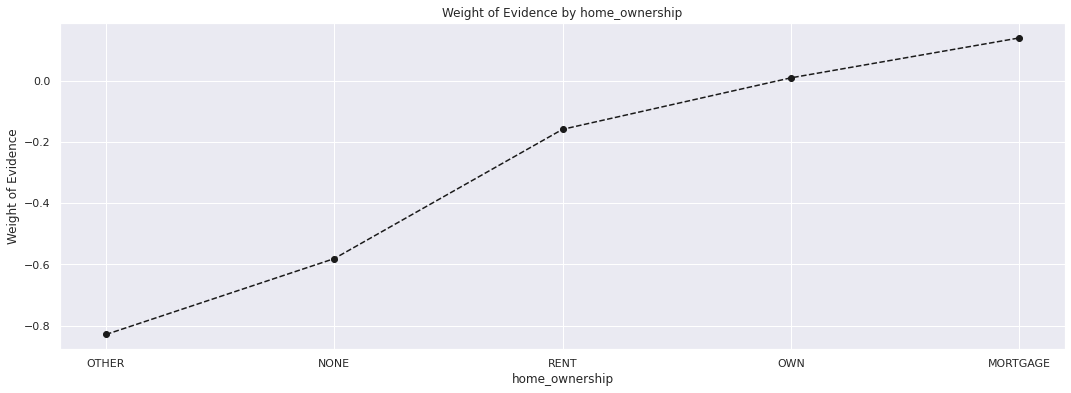

In [96]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [98]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.
X_prepr['home_ownership_RENT_OTHER_NONE_ANY'] = sum([X_prepr['home_ownership_RENT'], X_prepr['home_ownership_OTHER'],
                                                      X_prepr['home_ownership_NONE'], X_prepr['home_ownership_ANY']])
# 'RENT_OTHER_NONE_ANY' will be the reference category.

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

## Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [99]:
# 'addr_state'
X_prepr['addr_state'].unique()

array(['CA', 'RI', 'OR', 'VA', 'NV', 'NJ', 'FL', 'KY', 'CT', 'HI', 'MO',
       'NC', 'UT', 'MA', 'AZ', 'OK', 'MN', 'PA', 'MI', 'IL', 'WA', 'NH',
       'WY', 'TX', 'NM', 'OH', 'NY', 'SC', 'IN', 'WV', 'AL', 'AR', 'LA',
       'GA', 'TN', 'MT', 'CO', 'MD', 'WI', 'KS', 'AK', 'DC', 'DE', 'SD',
       'MS', 'VT', 'IA', 'NE', 'ME', 'ID'], dtype=object)

In [101]:
df_temp = calculate_woe_discrete(X_prepr, 'addr_state', y_prepr)
# We calculate weight of evidence.
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,12,0.416667,0.000032,5.0,7.0,0.000015,0.000172,-2.437194,NaN,NaN,inf
1,IA,12,0.750000,0.000032,9.0,3.0,0.000027,0.000074,-1.002110,0.333333,1.435085,inf
2,NV,5192,0.864407,0.013919,4488.0,704.0,0.013504,0.017310,-0.248338,0.114407,0.753772,inf
3,HI,1989,0.868276,0.005332,1727.0,262.0,0.005196,0.006442,-0.214925,0.003869,0.033412,inf
4,FL,25231,0.874955,0.067638,22076.0,3155.0,0.066422,0.077576,-0.155219,0.006680,0.059706,inf
5,ID,8,0.875000,0.000021,7.0,1.0,0.000021,0.000025,-0.154812,0.000045,0.000408,inf
6,AL,4667,0.878080,0.012511,4098.0,569.0,0.012330,0.013991,-0.126348,0.003080,0.028464,inf
7,NY,32137,0.884028,0.086152,28410.0,3727.0,0.085480,0.091640,-0.069584,0.005948,0.056764,inf
8,MD,8844,0.884668,0.023709,7824.0,1020.0,0.023541,0.025080,-0.063329,0.000640,0.006256,inf
9,NC,10178,0.884850,0.027285,9006.0,1172.0,0.027097,0.028817,-0.061543,0.000182,0.001786,inf


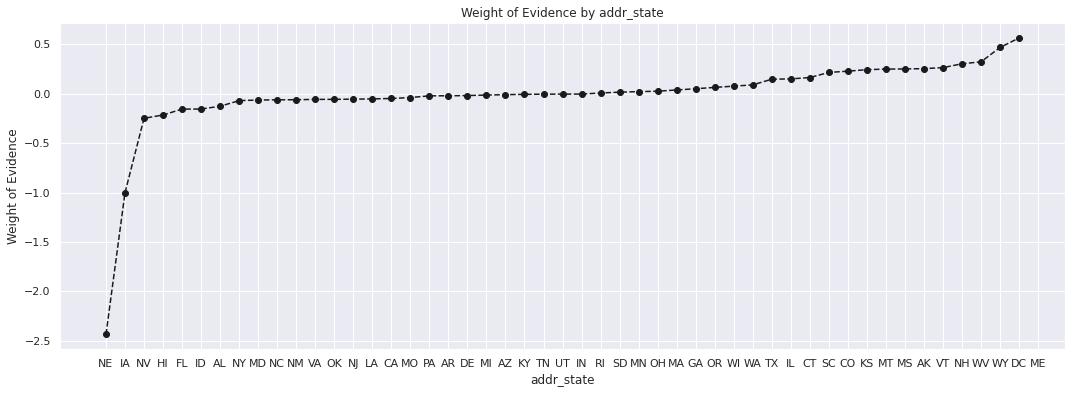

In [102]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [103]:
if ['addr_state_ND'] in X_prepr.columns.values:
    pass
else:
    X_prepr['addr_state_ND'] = 0

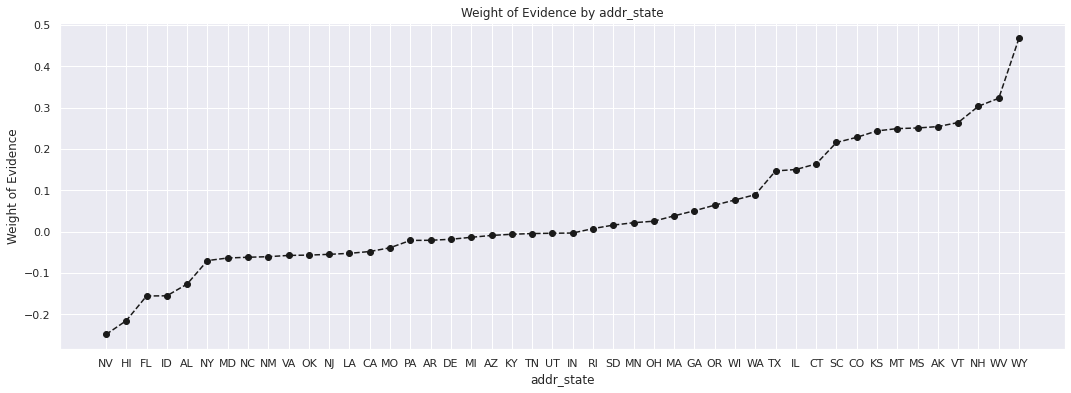

In [107]:
plot_by_woe(df_temp.iloc[2: -2, : ])
# We plot the weight of evidence values.

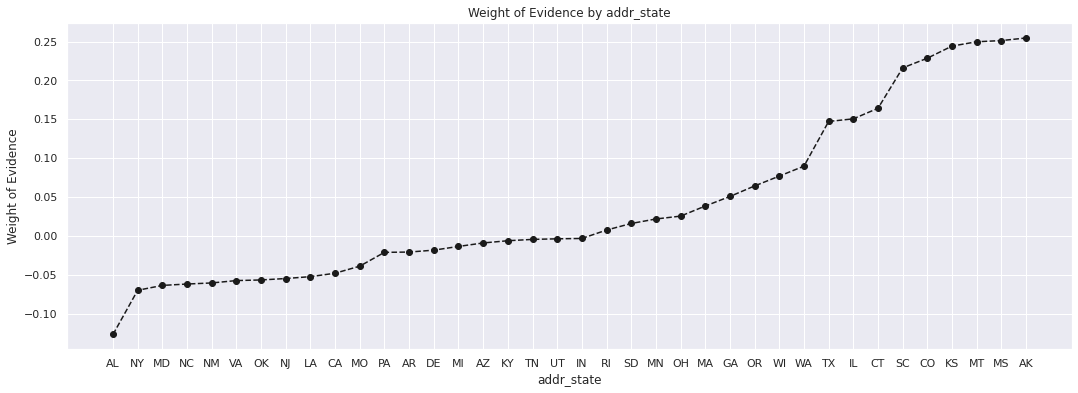

In [108]:
plot_by_woe(df_temp.iloc[6: -6, : ])
# We plot the weight of evidence values.

In [109]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

X_prepr['addr_state_ND_NE_IA_NV_FL_HI_AL'] = sum([X_prepr['addr_state_ND'], X_prepr['addr_state_NE'],
                                              X_prepr['addr_state_IA'], X_prepr['addr_state_NV'],
                                              X_prepr['addr_state_FL'], X_prepr['addr_state_HI'],
                                                          X_prepr['addr_state_AL']])

X_prepr['addr_state_NM_VA'] = sum([X_prepr['addr_state_NM'], X_prepr['addr_state_VA']])

X_prepr['addr_state_OK_TN_MO_LA_MD_NC'] = sum([X_prepr['addr_state_OK'], X_prepr['addr_state_TN'],
                                              X_prepr['addr_state_MO'], X_prepr['addr_state_LA'],
                                              X_prepr['addr_state_MD'], X_prepr['addr_state_NC']])

X_prepr['addr_state_UT_KY_AZ_NJ'] = sum([X_prepr['addr_state_UT'], X_prepr['addr_state_KY'],
                                              X_prepr['addr_state_AZ'], X_prepr['addr_state_NJ']])

X_prepr['addr_state_AR_MI_PA_OH_MN'] = sum([X_prepr['addr_state_AR'], X_prepr['addr_state_MI'],
                                              X_prepr['addr_state_PA'], X_prepr['addr_state_OH'],
                                              X_prepr['addr_state_MN']])

X_prepr['addr_state_RI_MA_DE_SD_IN'] = sum([X_prepr['addr_state_RI'], X_prepr['addr_state_MA'],
                                              X_prepr['addr_state_DE'], X_prepr['addr_state_SD'],
                                              X_prepr['addr_state_IN']])

X_prepr['addr_state_GA_WA_OR'] = sum([X_prepr['addr_state_GA'], X_prepr['addr_state_WA'],
                                              X_prepr['addr_state_OR']])

X_prepr['addr_state_WI_MT'] = sum([X_prepr['addr_state_WI'], X_prepr['addr_state_MT']])

X_prepr['addr_state_IL_CT'] = sum([X_prepr['addr_state_IL'], X_prepr['addr_state_CT']])

X_prepr['addr_state_KS_SC_CO_VT_AK_MS'] = sum([X_prepr['addr_state_KS'], X_prepr['addr_state_SC'],
                                              X_prepr['addr_state_CO'], X_prepr['addr_state_VT'],
                                              X_prepr['addr_state_AK'], X_prepr['addr_state_MS']])

X_prepr['addr_state_WV_NH_WY_DC_ME_ID'] = sum([X_prepr['addr_state_WV'], X_prepr['addr_state_NH'],
                                              X_prepr['addr_state_WY'], X_prepr['addr_state_DC'],
                                              X_prepr['addr_state_ME'], X_prepr['addr_state_ID']])

## Preprocessing Discrete Variables: Creating Dummy Variables, Part 3

In [111]:
# 'verification_status'
df_temp = calculate_woe_discrete(X_prepr, 'verification_status', y_prepr)
# We calculate weight of evidence.
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134536,0.872696,0.360659,117409.0,17127.0,0.353261,0.421121,-0.175715,NaN,NaN,0.021562
1,Source Verified,120153,0.896099,0.322102,107669.0,12484.0,0.323955,0.306958,0.053892,0.023403,0.229606,0.021562
2,Not Verified,118339,0.906548,0.317239,107280.0,11059.0,0.322784,0.271920,0.171476,0.010449,0.117584,0.021562


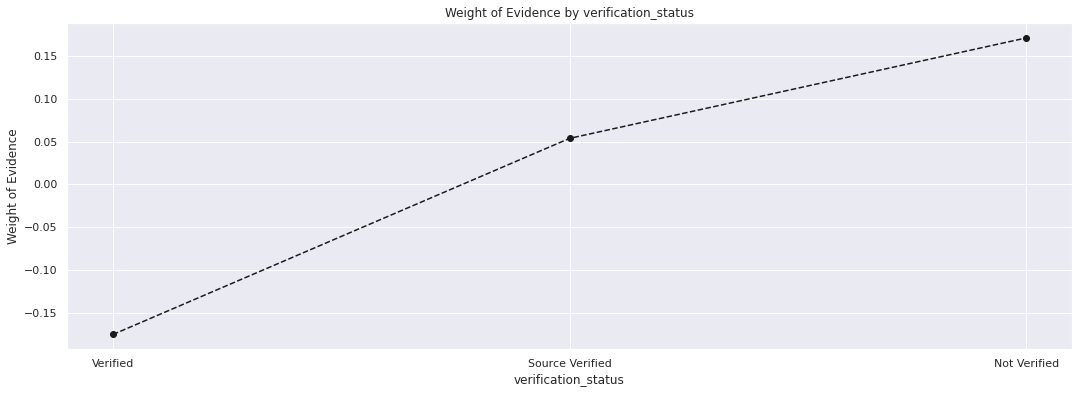

In [112]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [113]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
X_prepr['purpose_educ__sm_b__wedd__ren_en__mov__house'] = sum([X_prepr['purpose_educational'], X_prepr['purpose_small_business'],
                                                                 X_prepr['purpose_wedding'], X_prepr['purpose_renewable_energy'],
                                                                 X_prepr['purpose_moving'], X_prepr['purpose_house']])
X_prepr['purpose_oth__med__vacation'] = sum([X_prepr['purpose_other'], X_prepr['purpose_medical'],
                                             X_prepr['purpose_vacation']])
X_prepr['purpose_major_purch__car__home_impr'] = sum([X_prepr['purpose_major_purchase'], X_prepr['purpose_car'],
                                                        X_prepr['purpose_home_improvement']])

In [116]:
# 'initial_list_status'
df_temp = calculate_woe_discrete(X_prepr, 'initial_list_status', y_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242519,0.880269,0.650136,213482.0,29037.0,0.642325,0.713966,-0.105740,NaN,NaN,0.023588
1,w,130509,0.910864,0.349864,118876.0,11633.0,0.357675,0.286034,0.223513,0.030595,0.329253,0.023588


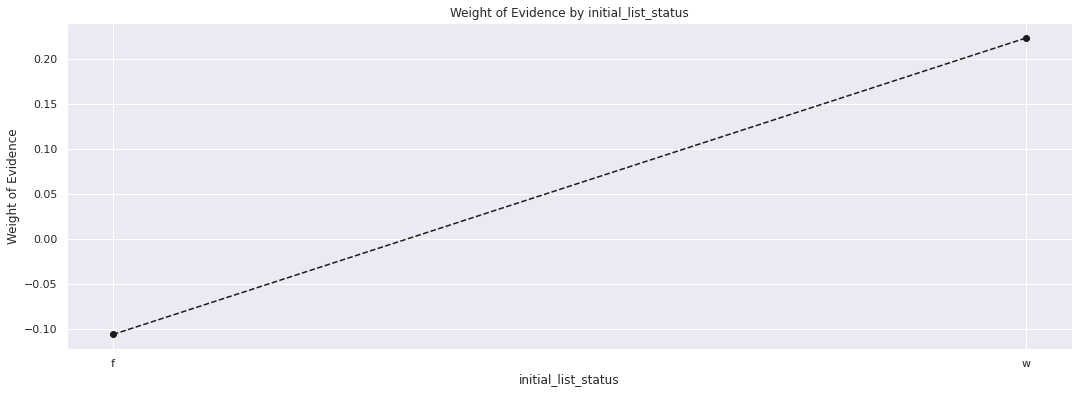

In [117]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

## Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [119]:
# WoE function for ordered discrete and continuous variables
def calculate_woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [106]:
X_prepr.columns.values

array(['id', 'member_id', 'loan_status', 'grade', 'sub_grade',
       'home_ownership', 'addr_state', 'verification_status', 'purpose',
       'initial_list_status', 'term_int', 'mths_since_issue_d', 'grade_A',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'addr_state_CT',
       'addr_state_CA', 'addr_state_IL', 'addr_state_WV', 'addr_state_MD',
 